<b>This project involves analyzing player data using a CSV file stored in a MySQL database and visualizing the analysis with Matplotlib.</b>

In [63]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

<b>IMPORT CSV FILE</b>

In [64]:
df=pd.read_csv('batting_summary.csv')
df

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7
...,...,...,...,...,...,...,...,...,...,...,...
911,48,India vs Australia,Australia,Travis Head,2,c Shubman Gill b Mohammed Siraj,137,120,15,4,114.167
912,48,India vs Australia,Australia,Mitchell Marsh,3,c KL Rahul b Jasprit Bumrah,15,15,1,1,100
913,48,India vs Australia,Australia,Steve Smith,4,lbw b Jasprit Bumrah,4,9,1,0,44.444
914,48,India vs Australia,Australia,Marnus Labuschagne,5,not out,58,110,4,0,52.727


<b>CREATE A DATABASE IF NOT EXIST</b>

In [10]:
try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21'
    )
    cursor=cur.cursor()
    sql='create database DataAnalysis'
    cursor.execute(sql)
    print('database created')
    
    cursor.close()
    cur.close()
    
except Error as e:
    print(e)

database created


<b>CREATE A TABLE IF NOT EXIST</b>

In [13]:
try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21',
    database='DataAnalysis'
    )
    cursor=cur.cursor()
    sql='create table Batting(Matchno int,MatchBetween varchar(100),TeamInnings varchar(100),BatsmanName varchar(100),BattingPosition int,Dismissal varchar(100),Runs int,Balls int,4s int,6s int,StrikeRate float)'
    cursor.execute(sql)
    print('Table created succesfully')
    
    cursor.close()
    cur.close()
    
except Error as e:
    print(e)   

Table created succesfully


<b>LOAD ALL DATA FROM  "batting_summary.csv"  FILE INTO THE BATTING MYSQL TABLE</b>

In [20]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

df=pd.read_csv('batting_summary.csv')
df

try:
    cur = mysql.connector.connect(
        host='localhost',
        user='root',
        password='viralshah21',
        database='DataAnalysis'
    )

    cursor = cur.cursor()

        # Step 4: Insert DataFrame data into the MySQL table
    for i, row in df.iterrows():
        sql = '''
            INSERT INTO Batting (Matchno, MatchBetween, TeamInnings, BatsmanName, BattingPosition, Dismissal, Runs, Balls, 4s, 6s, StrikeRate)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''
        cursor.execute(sql, tuple(row))
        cur.commit()

    cursor.close()
    cur.close()
    print("MySQL connection is closed")

except Error as e:
    print(f"Error: {e}")

print("All data has been successfully inserted into the Batting table.")


Error: 1265 (01000): Data truncated for column 'StrikeRate' at row 1
All data has been successfully inserted into the Batting table.


In [65]:
df=pd.read_csv('batting_summary.csv')
df

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7
...,...,...,...,...,...,...,...,...,...,...,...
911,48,India vs Australia,Australia,Travis Head,2,c Shubman Gill b Mohammed Siraj,137,120,15,4,114.167
912,48,India vs Australia,Australia,Mitchell Marsh,3,c KL Rahul b Jasprit Bumrah,15,15,1,1,100
913,48,India vs Australia,Australia,Steve Smith,4,lbw b Jasprit Bumrah,4,9,1,0,44.444
914,48,India vs Australia,Australia,Marnus Labuschagne,5,not out,58,110,4,0,52.727


<B>SHOW MATCHNO 5 ALL DATA FROM THE CSV FILE</B>

In [66]:
df1=df[['Matchno','MatchBetween','TeamInnings','BatsmanName','BattingPosition','Dismissal','Runs','Balls','4s','6s','StrikeRate']][df['Matchno']== 5]
df1

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
71,5,Australia vs India,Australia,David Warner,1,c & b Kuldeep Yadav,41,52,6,0,78.8
72,5,Australia vs India,Australia,Mitchell Marsh,2,c Virat Kohli b Jasprit Bumrah,0,6,0,0,0
73,5,Australia vs India,Australia,Steve Smith,3,b Ravindra Jadeja,46,71,5,0,64.8
74,5,Australia vs India,Australia,Marnus Labuschagne,4,c KL Rahul b Ravindra Jadeja,27,41,1,0,65.9
75,5,Australia vs India,Australia,Glenn Maxwell,5,b Kuldeep Yadav,15,25,1,0,60
76,5,Australia vs India,Australia,Alex Carey,6,lbw b Ravindra Jadeja,0,2,0,0,0
77,5,Australia vs India,Australia,Cameron Green,7,c Hardik Pandya b Ravichandran Ashwin,8,20,0,0,40
78,5,Australia vs India,Australia,Pat Cummins,8,c Shreyas Iyer b Jasprit Bumrah,15,24,1,1,62.5
79,5,Australia vs India,Australia,Mitchell Starc,9,c Shreyas Iyer b Mohammed Siraj,28,35,2,1,80
80,5,Australia vs India,Australia,Adam Zampa,10,c Virat Kohli b Hardik Pandya,6,20,0,0,30


<B>TO GET STRIKERATE AND TEAMNAME FOR TEAM AUSTRALIA</B>

In [67]:
australia=df1[['Matchno','MatchBetween','TeamInnings','BatsmanName','BattingPosition','Dismissal','Runs','Balls','4s','6s','StrikeRate']][(df1['StrikeRate'] != 0)&(df1['TeamInnings']=='Australia')]
australia

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
71,5,Australia vs India,Australia,David Warner,1,c & b Kuldeep Yadav,41,52,6,0,78.8
72,5,Australia vs India,Australia,Mitchell Marsh,2,c Virat Kohli b Jasprit Bumrah,0,6,0,0,0
73,5,Australia vs India,Australia,Steve Smith,3,b Ravindra Jadeja,46,71,5,0,64.8
74,5,Australia vs India,Australia,Marnus Labuschagne,4,c KL Rahul b Ravindra Jadeja,27,41,1,0,65.9
75,5,Australia vs India,Australia,Glenn Maxwell,5,b Kuldeep Yadav,15,25,1,0,60
76,5,Australia vs India,Australia,Alex Carey,6,lbw b Ravindra Jadeja,0,2,0,0,0
77,5,Australia vs India,Australia,Cameron Green,7,c Hardik Pandya b Ravichandran Ashwin,8,20,0,0,40
78,5,Australia vs India,Australia,Pat Cummins,8,c Shreyas Iyer b Jasprit Bumrah,15,24,1,1,62.5
79,5,Australia vs India,Australia,Mitchell Starc,9,c Shreyas Iyer b Mohammed Siraj,28,35,2,1,80
80,5,Australia vs India,Australia,Adam Zampa,10,c Virat Kohli b Hardik Pandya,6,20,0,0,30


<B>TO GET STRIKERATE AND TEAMNAME FOR TEAM INDIA</B>

In [68]:
india=df1[['Matchno','MatchBetween','TeamInnings','BatsmanName','BattingPosition','Dismissal','Runs','Balls','4s','6s','StrikeRate']][(df1['StrikeRate'] != 0)&(df1['TeamInnings']=='India')]
india

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
82,5,Australia vs India,India,Rohit Sharma,1,lbw b Josh Hazlewood,0,6,0,0,0
83,5,Australia vs India,India,Ishan Kishan,2,c Cameron Green b Mitchell Starc,0,1,0,0,0
84,5,Australia vs India,India,Virat Kohli,3,c Marnus Labuschagne b Josh Hazlewood,85,116,6,0,73.3
85,5,Australia vs India,India,Shreyas Iyer,4,c David Warner b Josh Hazlewood,0,3,0,0,0
86,5,Australia vs India,India,KL Rahul,5,not out,97,115,8,2,84.3
87,5,Australia vs India,India,Hardik Pandya,6,not out,11,8,0,1,137.5


<B>WE ARE VISUALIZING THE BATTING STRIKE RATES OF TEAM INDIA AND TEAM AUSTRALIA.</B>

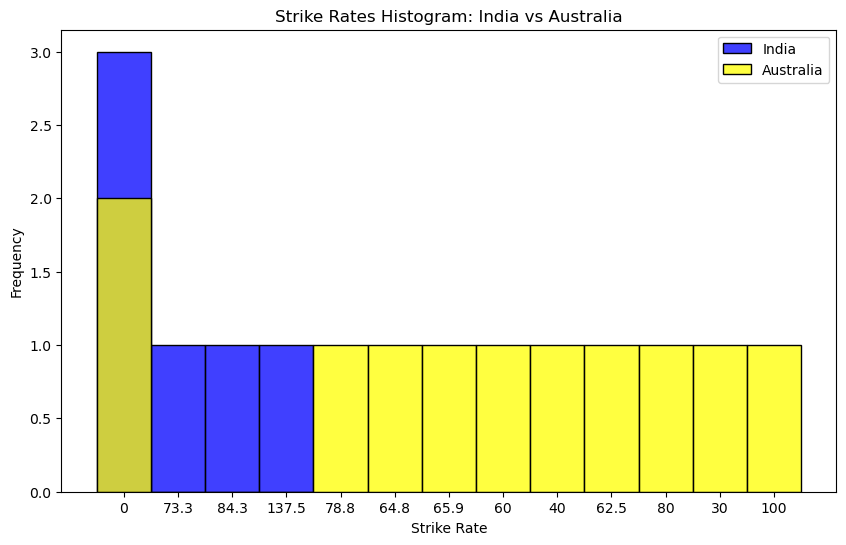

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

india_strike_rates = df1.loc[(df1['StrikeRate'] != 0) & (df1['TeamInnings'] == 'India'), 'StrikeRate']
australia_strike_rates = df1.loc[(df1['StrikeRate'] != 0) & (df1['TeamInnings'] == 'Australia'), 'StrikeRate']

plt.figure(figsize=(10, 6))

sns.histplot(india_strike_rates, bins=20, kde=False, color='blue', label='India')
sns.histplot(australia_strike_rates, bins=20, kde=False, color='yellow', label='Australia')

plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.title('Strike Rates Histogram: India vs Australia')
plt.legend()

plt.show()


<b>DATA OF AUSTRAILA VS INDIA TEAM</B>

In [117]:
df1

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
71,5,Australia vs India,Australia,David Warner,1,c & b Kuldeep Yadav,41,52,6,0,78.8
72,5,Australia vs India,Australia,Mitchell Marsh,2,c Virat Kohli b Jasprit Bumrah,0,6,0,0,0
73,5,Australia vs India,Australia,Steve Smith,3,b Ravindra Jadeja,46,71,5,0,64.8
74,5,Australia vs India,Australia,Marnus Labuschagne,4,c KL Rahul b Ravindra Jadeja,27,41,1,0,65.9
75,5,Australia vs India,Australia,Glenn Maxwell,5,b Kuldeep Yadav,15,25,1,0,60
76,5,Australia vs India,Australia,Alex Carey,6,lbw b Ravindra Jadeja,0,2,0,0,0
77,5,Australia vs India,Australia,Cameron Green,7,c Hardik Pandya b Ravichandran Ashwin,8,20,0,0,40
78,5,Australia vs India,Australia,Pat Cummins,8,c Shreyas Iyer b Jasprit Bumrah,15,24,1,1,62.5
79,5,Australia vs India,Australia,Mitchell Starc,9,c Shreyas Iyer b Mohammed Siraj,28,35,2,1,80
80,5,Australia vs India,Australia,Adam Zampa,10,c Virat Kohli b Hardik Pandya,6,20,0,0,30


<b>TO GET TEAM INDIA PLAYERS RUNS AND VISUALIZE MATPLOTLIB</b>

<UL>
    <LI>STEP-1: CREATE CSV FILE TEAM INDIA VS AUSTRIALA FOR INDIA BATTING  </LI>
</UL>

In [91]:
india.to_excel('IndiaBatting.xlsx')
india

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
82,5,Australia vs India,India,Rohit Sharma,1,lbw b Josh Hazlewood,0,6,0,0,0
83,5,Australia vs India,India,Ishan Kishan,2,c Cameron Green b Mitchell Starc,0,1,0,0,0
84,5,Australia vs India,India,Virat Kohli,3,c Marnus Labuschagne b Josh Hazlewood,85,116,6,0,73.3
85,5,Australia vs India,India,Shreyas Iyer,4,c David Warner b Josh Hazlewood,0,3,0,0,0
86,5,Australia vs India,India,KL Rahul,5,not out,97,115,8,2,84.3
87,5,Australia vs India,India,Hardik Pandya,6,not out,11,8,0,1,137.5


<UL>
    <LI>STEP-2:BATSMAN NAME AND RUNS SHOWN INTO THE GRAPH</LI>
</UL>

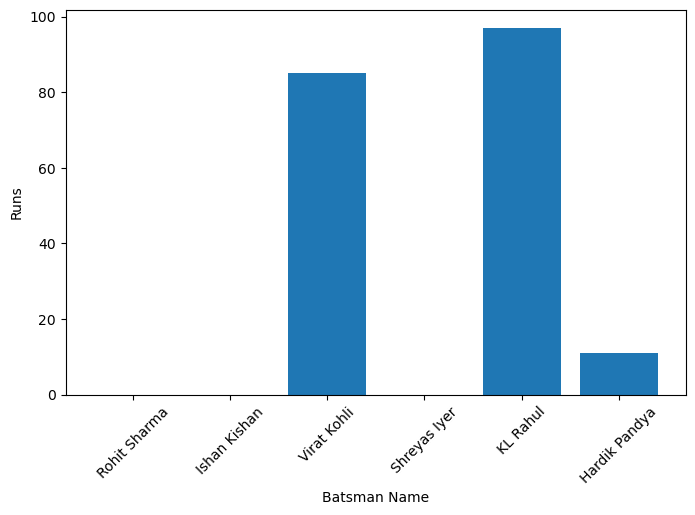

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_excel('IndiaBatting.xlsx')
df

plt.figure(figsize=(8, 5))  # Set figure size (width, height)
plt.bar(x, y, color='skyblue')  # Bar plot with specified color
x=df['BatsmanName']
y=df['Runs']
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.bar(x,y)
plt.show()

<b>TO GET TEAM AUSTRALIA PLAYERS RUNS AND VISUALIZE MATPLOTLIB</b>

<UL>
    <LI>STEP-1: CREATE CSV FILE TEAM INDIA VS AUSTRIALA FOR AUSTRALIA BATTING  </LI>
</UL>

In [94]:
australia.to_excel('AustaliaBatting.xlsx')
australia

,Matchno,MatchBetween,TeamInnings,BatsmanName,BattingPosition,Dismissal,Runs,Balls,4s,6s,StrikeRate
71,5,Australia vs India,Australia,David Warner,1,c & b Kuldeep Yadav,41,52,6,0,78.8
72,5,Australia vs India,Australia,Mitchell Marsh,2,c Virat Kohli b Jasprit Bumrah,0,6,0,0,0
73,5,Australia vs India,Australia,Steve Smith,3,b Ravindra Jadeja,46,71,5,0,64.8
74,5,Australia vs India,Australia,Marnus Labuschagne,4,c KL Rahul b Ravindra Jadeja,27,41,1,0,65.9
75,5,Australia vs India,Australia,Glenn Maxwell,5,b Kuldeep Yadav,15,25,1,0,60
76,5,Australia vs India,Australia,Alex Carey,6,lbw b Ravindra Jadeja,0,2,0,0,0
77,5,Australia vs India,Australia,Cameron Green,7,c Hardik Pandya b Ravichandran Ashwin,8,20,0,0,40
78,5,Australia vs India,Australia,Pat Cummins,8,c Shreyas Iyer b Jasprit Bumrah,15,24,1,1,62.5
79,5,Australia vs India,Australia,Mitchell Starc,9,c Shreyas Iyer b Mohammed Siraj,28,35,2,1,80
80,5,Australia vs India,Australia,Adam Zampa,10,c Virat Kohli b Hardik Pandya,6,20,0,0,30


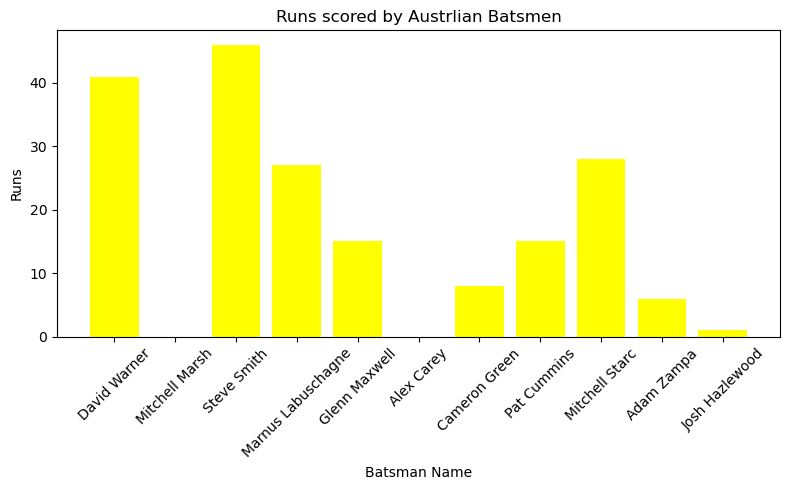

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('AustaliaBatting.xlsx')

x = df['BatsmanName']
y = df['Runs']

plt.figure(figsize=(8, 5))  # Set figure size (width, height)
plt.bar(x, y, color='yellow')  # Bar plot with specified color
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Runs scored by Austrlian Batsmen')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()
